In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time
import keras
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense

In [ ]:
url_dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
df = pd.read_csv(url_dataset, delimiter=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
kolum= ['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval',
       'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS', 'T', 'P', 'QRST', 'J',
       'heartrate', 'chDI_Qwave', 'chDI_Rwave', 'chDI_Swave', 'chDI_RPwave',
       'chDI_SPwave', 'chDI_intrinsicReflecttions', 'chDI_RRwaveExists',
       'chDI_DD_RRwaveExists', 'chDI_RPwaveExists', 'chDI_DD_RPwaveExists',
       'chDI_RTwaveExists', 'chDI_DD_RTwaveExists', 'chDII_Qwave',
       'chDII_Rwave', 'chDII_Swave', 'chDII_RPwave', 'chDII_SPwave',
       'chDII_intrinsicReflecttions', 'chDII_RRwaveExists',
       'chDII_DD_RRwaveExists', 'chDII_RPwaveExists', 'chDII_DD_RPwaveExists',
       'chDII_RTwaveExists', 'chDII_DD_RTwaveExists', 'chDIII_Qwave',
       'chDIII_Rwave', 'chDIII_Swave', 'chDIII_RPwave', 'chDIII_SPwave',
       'chDIII_intrinsicReflecttions', 'chDIII_RRwaveExists',
       'chDIII_DD_RRwaveExists', 'chDIII_RPwaveExists',
       'chDIII_DD_RPwaveExists', 'chDIII_RTwaveExists',
       'chDIII_DD_RTwaveExists', 'chAVR_Qwave', 'chAVR_Rwave', 'chAVR_Swave',
       'chAVR_RPwave', 'chAVR_SPwave', 'chAVR_intrinsicReflecttions',
       'chAVR_RRwaveExists', 'chAVR_DD_RRwaveExists', 'chAVR_RPwaveExists',
       'chAVR_DD_RPwaveExists', 'chAVR_RTwaveExists', 'chAVR_DD_RTwaveExists',
       'chAVL_Qwave', 'chAVL_Rwave', 'chAVL_Swave', 'chAVL_RPwave',
       'chAVL_SPwave', 'chAVL_intrinsicReflecttions', 'chAVL_RRwaveExists',
       'chAVL_DD_RRwaveExists', 'chAVL_RPwaveExists', 'chAVL_DD_RPwaveExists',
       'chAVL_RTwaveExists', 'chAVL_DD_RTwaveExists', 'chAVF_Qwave',
       'chAVF_Rwave', 'chAVF_Swave', 'chAVF_RPwave', 'chAVF_SPwave',
       'chAVF_intrinsicReflecttions', 'chAVF_RRwaveExists',
       'chAVF_DD_RRwaveExists', 'chAVF_RPwaveExists', 'chAVF_DD_RPwaveExists',
       'chAVF_RTwaveExists', 'chAVF_DD_RTwaveExists', 'chV1_Qwave',
       'chV1_Rwave', 'chV1_Swave', 'chV1_RPwave', 'chV1_SPwave',
       'chV1_intrinsicReflecttions', 'chV1_RRwaveExists',
       'chV1_DD_RRwaveExists', 'chV1_RPwaveExists', 'chV1_DD_RPwaveExists',
       'chV1_RTwaveExists', 'chV1_DD_RTwaveExists', 'chV2_Qwave',
       'chV2_Rwave', 'chV2_Swave', 'chV2_RPwave', 'chV2_SPwave',
       'chV2_intrinsicReflecttions', 'chV2_RRwaveExists',
       'chV2_DD_RRwaveExists', 'chV2_RPwaveExists', 'chV2_DD_RPwaveExists',
       'chV2_RTwaveExists', 'chV2_DD_RTwaveExists', 'chV3_Qwave', 'chV3_Rwave',
       'chV3_Swave', 'chV3_RPwave', 'chV3_SPwave',
       'chV3_intrinsicReflecttions', 'chV3_RRwaveExists',
       'chV3_DD_RRwaveExists', 'chV3_RPwaveExists', 'chV3_DD_RPwaveExists',
       'chV3_RTwaveExists', 'chV3_DD_RTwaveExists', 'chV4_Qwave', 'chV4_Rwave',
       'chV4_Swave', 'chV4_RPwave', 'chV4_SPwave',
       'chV4_intrinsicReflecttions', 'chV4_RRwaveExists',
       'chV4_DD_RRwaveExists', 'chV4_RPwaveExists', 'chV4_DD_RPwaveExists',
       'chV4_RTwaveExists', 'chV4_DD_RTwaveExists', 'chV5_Qwave', 'chV5_Rwave',
       'chV5_Swave', 'chV5_RPwave', 'chV5_SPwave',
       'chV5_intrinsicReflecttions', 'chV5_RRwaveExists',
       'chV5_DD_RRwaveExists', 'chV5_RPwaveExists', 'chV5_DD_RPwaveExists',
       'chV5_RTwaveExists', 'chV5_DD_RTwaveExists', 'chV6_Qwave', 'chV6_Rwave',
       'chV6_Swave', 'chV6_RPwave', 'chV6_SPwave',
       'chV6_intrinsicReflecttions', 'chV6_RRwaveExists',
       'chV6_DD_RRwaveExists', 'chV6_RPwaveExists', 'chV6_DD_RPwaveExists',
       'chV6_RTwaveExists', 'chV6_DD_RTwaveExists', 'chDI_JJwaveAmp',
       'chDI_QwaveAmp', 'chDI_RwaveAmp', 'chDI_SwaveAmp', 'chDI_RPwaveAmp',
       'chDI_SPwaveAmp', 'chDI_PwaveAmp', 'chDI_TwaveAmp', 'chDI_QRSA',
       'chDI_QRSTA', 'chDII_JJwaveAmp', 'chDII_QwaveAmp', 'chDII_RwaveAmp',
       'chDII_SwaveAmp', 'chDII_RPwaveAmp', 'chDII_SPwaveAmp',
       'chDII_PwaveAmp', 'chDII_TwaveAmp', 'chDII_QRSA', 'chDII_QRSTA',
       'chDIII_JJwaveAmp', 'chDIII_QwaveAmp', 'chDIII_RwaveAmp',
       'chDIII_SwaveAmp', 'chDIII_RPwaveAmp', 'chDIII_SPwaveAmp',
       'chDIII_PwaveAmp', 'chDIII_TwaveAmp', 'chDIII_QRSA', 'chDIII_QRSTA',
       'chAVR_JJwaveAmp', 'chAVR_QwaveAmp', 'chAVR_RwaveAmp', 'chAVR_SwaveAmp',
       'chAVR_RPwaveAmp', 'chAVR_SPwaveAmp', 'chAVR_PwaveAmp',
       'chAVR_TwaveAmp', 'chAVR_QRSA', 'chAVR_QRSTA', 'chAVL_JJwaveAmp',
       'chAVL_QwaveAmp', 'chAVL_RwaveAmp', 'chAVL_SwaveAmp', 'chAVL_RPwaveAmp',
       'chAVL_SPwaveAmp', 'chAVL_PwaveAmp', 'chAVL_TwaveAmp', 'chAVL_QRSA',
       'chAVL_QRSTA', 'chAVF_JJwaveAmp', 'chAVF_QwaveAmp', 'chAVF_RwaveAmp',
       'chAVF_SwaveAmp', 'chAVF_RPwaveAmp', 'chAVF_SPwaveAmp',
       'chAVF_PwaveAmp', 'chAVF_TwaveAmp', 'chAVF_QRSA', 'chAVF_QRSTA',
       'chV1_JJwaveAmp', 'chV1_QwaveAmp', 'chV1_RwaveAmp', 'chV1_SwaveAmp',
       'chV1_RPwaveAmp', 'chV1_SPwaveAmp', 'chV1_PwaveAmp', 'chV1_TwaveAmp',
       'chV1_QRSA', 'chV1_QRSTA', 'chV2_JJwaveAmp', 'chV2_QwaveAmp',
       'chV2_RwaveAmp', 'chV2_SwaveAmp', 'chV2_RPwaveAmp', 'chV2_SPwaveAmp',
       'chV2_PwaveAmp', 'chV2_TwaveAmp', 'chV2_QRSA', 'chV2_QRSTA',
       'chV3_JJwaveAmp', 'chV3_QwaveAmp', 'chV3_RwaveAmp', 'chV3_SwaveAmp',
       'chV3_RPwaveAmp', 'chV3_SPwaveAmp', 'chV3_PwaveAmp', 'chV3_TwaveAmp',
       'chV3_QRSA', 'chV3_QRSTA', 'chV4_JJwaveAmp', 'chV4_QwaveAmp',
       'chV4_RwaveAmp', 'chV4_SwaveAmp', 'chV4_RPwaveAmp', 'chV4_SPwaveAmp',
       'chV4_PwaveAmp', 'chV4_TwaveAmp', 'chV4_QRSA', 'chV4_QRSTA',
       'chV5_JJwaveAmp', 'chV5_QwaveAmp', 'chV5_RwaveAmp', 'chV5_SwaveAmp',
       'chV5_RPwaveAmp', 'chV5_SPwaveAmp', 'chV5_PwaveAmp', 'chV5_TwaveAmp',
       'chV5_QRSA', 'chV5_QRSTA', 'chV6_JJwaveAmp', 'chV6_QwaveAmp',
       'chV6_RwaveAmp', 'chV6_SwaveAmp', 'chV6_RPwaveAmp', 'chV6_SPwaveAmp',
       'chV6_PwaveAmp', 'chV6_TwaveAmp', 'chV6_QRSA', 'chV6_QRSTA', 'class']
df.columns = kolum

In [ ]:
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
df.tail()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
df.shape

(452, 280)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [ ]:
#pengecekan missiing value
#df.isnull().sum()

In [ ]:
#cek apakah ada missing value
df.isin(['?']).sum().sum()

408

In [ ]:
#menghapus yang ada missing value
df=df.replace('?', np.NaN)

In [ ]:
#cek apakah masih ada data yang missing value
df.isin(['?']).sum().sum()

0

Text(0.5, 0, 'kolum')

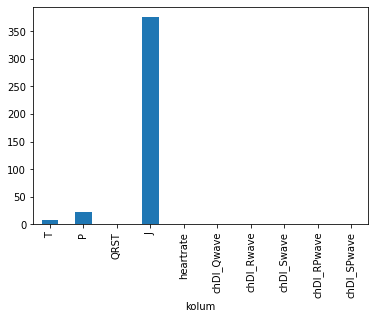

In [ ]:
#mengecek data di kolum mana yang banyak kosong
pd.isnull(df).sum()[10:20].plot(kind="bar")
plt.xlabel('kolum')

In [ ]:
#menghapus kolum j
df=df.drop('J', axis=1)

In [ ]:
#ubah data bertipe objek ke numerik
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
#ganti data kosong jadi median
df = df.fillna(df.median())
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
#Karena kita melakukan multiclass classification, kita perlu mengkodekan label target dan mengubahnya dalam bentuk kategoris “class”. 
y = df["class"]
x = df.drop(['class'], axis=1)
x = np.array(x)
y = np.array(y)
x[:10], y[:10]

(array([[ 75. ,   0. , 190. , ...,   2.9,  23.3,  49.4],
        [ 56. ,   1. , 165. , ...,   2.1,  20.4,  38.8],
        [ 54. ,   0. , 172. , ...,   3.4,  12.3,  49. ],
        ...,
        [ 49. ,   1. , 162. , ...,   0.5,  15.8,  19.8],
        [ 44. ,   0. , 168. , ...,   2.1,  12.5,  30.9],
        [ 50. ,   1. , 167. , ...,   0.9,  20.1,  25.1]]),
 array([ 8,  6, 10,  1,  7, 14,  1,  1,  1, 10]))

In [ ]:
#Karena kita melakukan multiclass klasifikasi, kita perlu mengkodekan label target dan mengubahnya dalam bentuk kategori.
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
y = to_categorical(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#data split
x_train, x_test, y_train, y_test, = train_test_split (x,y, test_size = 0.3, random_state = 5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((316, 278), (316, 13), (136, 278), (136, 13))

modeling

In [ ]:
in_dim = len(df.columns)-1

model = Sequential()
#input 
model.add(Dense(278, input_dim = in_dim, activation = 'relu'))

#layer
model.add(Dense(316, activation = 'relu'))
model.add(Dense(316, activation = 'relu'))
model.add(Dense(316, activation = 'relu'))

#output
model.add(Dense(13, activation = 'softmax'))
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:

# Constructing the input
x = x_train
y = y_train
 
# fitting the model
histori = model.fit(x, y, epochs=20, batch_size = 8) 

Epoch 1/20
40/40 [==============================] - 1s 5ms/step - loss: 6.0358 - accuracy: 0.4620
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 1.4232 - accuracy: 0.6329
Epoch 3/20
40/40 [==============================] - 0s 4ms/step - loss: 0.9961 - accuracy: 0.7057
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.7941 - accuracy: 0.7753
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6035 - accuracy: 0.8228
Epoch 6/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.8133
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.8101
Epoch 8/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.8608
Epoch 9/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4529 - accuracy: 0.8639
Epoch 10/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.8513
Epoch 11/20
40/40 [

In [ ]:
print("Evaluasi data ")
results = model.evaluate(x_test, y_test, batch_size=16)
print(results)

Evaluasi data 
9/9 [==============================] - 0s 2ms/step - loss: 2.2379 - accuracy: 0.6618
[2.2379424571990967, 0.6617646813392639]


<function matplotlib.pyplot.show(*args, **kw)>

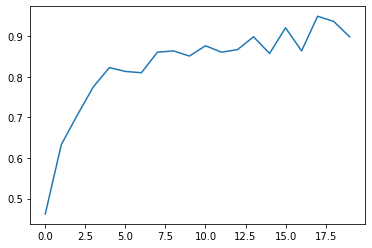

In [ ]:

plt.plot(histori.history['accuracy'],linestyle="solid", label='train')
plt.show

In [ ]:
print("Accuracy Training :", histori.history['accuracy'][-1])
print("Accuracy Validation :", results[1])

Accuracy Training : 0.8987341523170471
Accuracy Validation : 0.6617646813392639
